In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

# Functions

In [2]:
def weighted_sum(inputs, weights):
    total = 0
    for input_value, weight in zip(inputs, weights):
        total += input_value * weight

    return total

def step_function(number):
    if number >= 2:
        return 1
    else:
        return 0

def determine_layer_outputs(list_of_inputs, list_of_weights, activation_function=True):
    layer_outputs = []
    for inputs in list_of_inputs:
        
        node_outputs = []
        for weights in list_of_weights:
            node_input = weighted_sum(inputs, weights)
            if activation_function:
                node_output = step_function(node_input)
            else:
                node_output = node_input
            node_outputs.append(node_output)
            
        layer_outputs.append(node_outputs)

    return layer_outputs

# Data Creation

Caution! The following cell needs a long time to run.

In [3]:
np.random.seed(0)

matrix_sizes = range(10, 410, 10)
data = {"matrix_size": [], "python": [], "numpy": []}
for n in matrix_sizes:
    
    # data generation
    matrix = np.random.random(size=(n, n))        # data for numpy
    list_of_lists = matrix.tolist()               # data for pure python
    
    # timing the functions
    # (use transpose in np.dot to ensure that the same numbers as in determine_layer_outputs get multiplied)
    time_python = %timeit -o determine_layer_outputs(list_of_lists, list_of_lists, activation_function=False)
    time_numpy = %timeit -o np.dot(matrix, matrix.T)
    
    # storing the data
    data["matrix_size"].append("{}x{}".format(n, n))
    data["python"].append(time_python.average)
    data["numpy"].append(time_numpy.average)

data = pd.DataFrame(data)
data.to_csv("../data/run_time_comparison.csv", index=False)

103 µs ± 3.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.36 µs ± 16.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
602 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.17 µs ± 28 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.83 ms ± 31.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.7 µs ± 31.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.17 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.28 µs ± 199 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.75 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.13 µs ± 528 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
13.1 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.1 µs ± 545 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
20.4 ms ± 657 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
12.7 µs ± 205 ns per loop (mean ± std. dev. of 7 runs, 

# Plots

In [4]:
df = pd.read_csv("../../data/run_time_comparison.csv", index_col=0)

## 1. Only "pure Python"

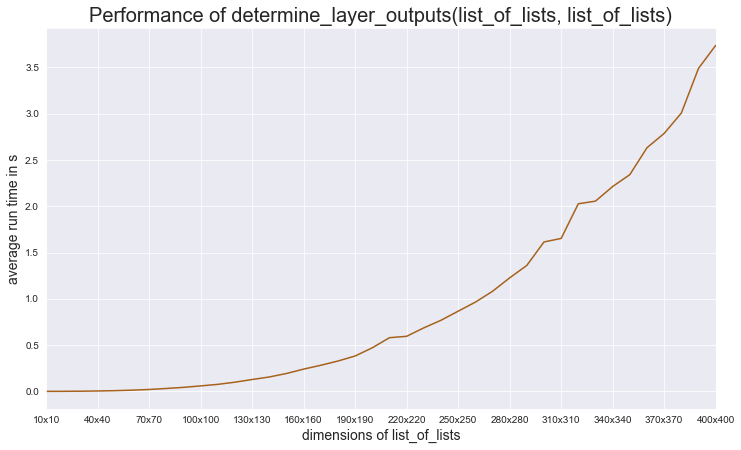

In [5]:
df.python.plot(figsize=(12,7), xticks=range(0, 41, 3), color="#a6611a")

plt.title("Performance of determine_layer_outputs(list_of_lists, list_of_lists)", fontsize=20)
plt.xlabel("dimensions of list_of_lists", fontsize=14)
plt.ylabel("average run time in s", fontsize=14);

## 2. "Pure Python" vs. NumPy

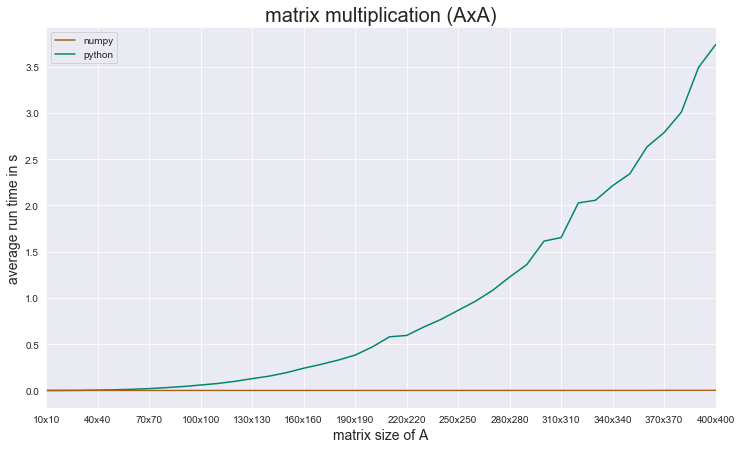

In [6]:
df.plot(figsize=(12,7), xticks=range(0, 41, 3), legend="reverse", color=("#018571", "#a6611a"))

plt.title("matrix multiplication (AxA)", fontsize=20)
plt.xlabel("matrix size of A", fontsize=14)
plt.ylabel("average run time in s", fontsize=14);

## 3. Only NumPy

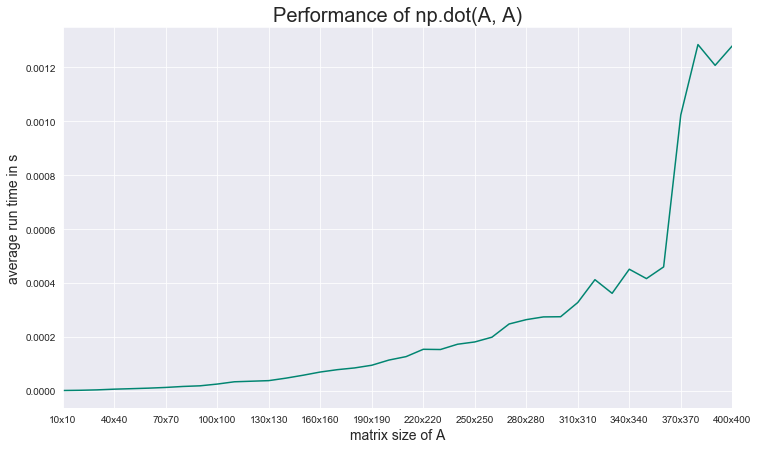

In [7]:
df.numpy.plot(figsize=(12,7), xticks=range(0, 41, 3), color="#018571")

plt.title("Performance of np.dot(A, A)", fontsize=20)
plt.xlabel("matrix size of A", fontsize=14)
plt.ylabel("average run time in s", fontsize=14);